<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Healthcare/blob/main/Diabetes_Prediction_with_MLs_DLs_and_Advanced_Combined_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/_Python/diabetes_data/diabetes_01.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# filling missing values with mean values
data.fillna(data.mean(), inplace=True)

In [7]:
data.shape

(768, 9)

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

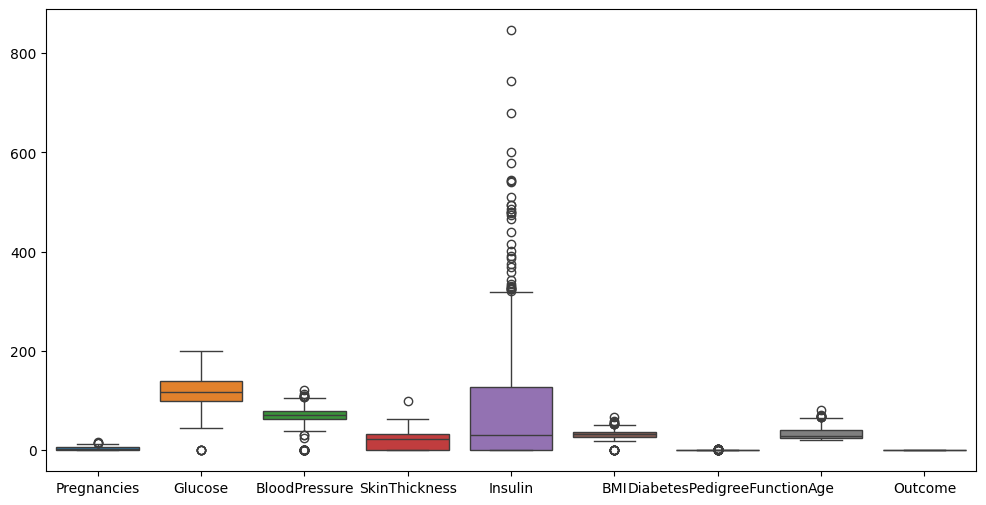

In [9]:
plt.figure(figsize=(12, 6), facecolor='w')
sns.boxplot(data=data)
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
plt.show()

In [11]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
#grouped = pd.DataFrame(grouped)

# Further Analysis with MLs and DLs

**Multivariate Analysis:**
 - We can use logistic regression to evaluate the combined impact of various factors on Outcome status.

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC: 0.81


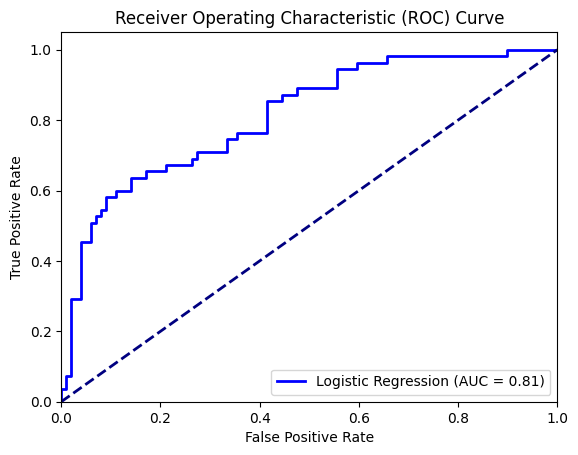

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare the data for logistic regression
# Add relevant variables as needed
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
          'DiabetesPedigreeFunction','Age']]
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Implementation of Advanced Resampling Techniques and Model Tuning:
**Random Forest model with 6 feature importances**

Using SMOTE:

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        99
           1       0.80      0.88      0.84       101

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

ROC AUC: 0.89


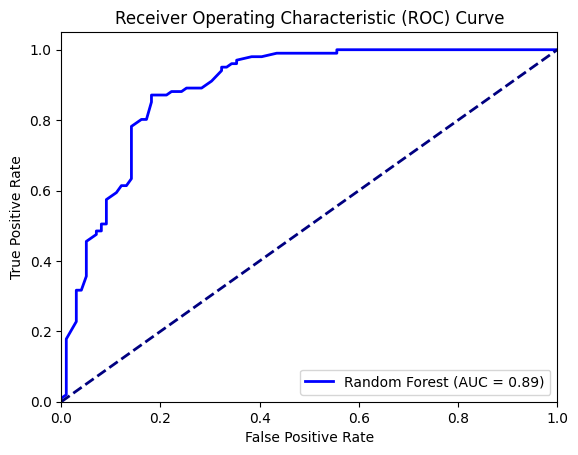

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define a parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The Random Forest model has significantly improved performance compared to the logistic regression model. The AUC has increased to 0.87, indicating a much better ability to distinguish between the positive and negative classes. Additionally, the precision, recall, and F1-score metrics have improved for both classes.

**Summary of Metrics:**

1. Precision, Recall, and F1-Score:
- Class 0 (Negative):
   - Precision: 0.87
   - Recall: 0.78
   - F1-Score: 0.82
- Class 1 (Positive):
  - Precision: 0.80
  - Recall: 0.88
  - F1-Score: 0.84
2. Overall Accuracy:
- The overall accuracy is 0.83, which is a good improvement and indicates balanced performance across both classes.
3. ROC AUC:
- The ROC AUC of 0.89 suggests that the model has a high discriminative power and is effective at distinguishing between the two classes.

**Analysis and Interpretation:**
- Balanced Performance: The Random Forest model shows balanced performance across both classes, with similar precision, recall, and F1-scores for both the negative and positive classes. This indicates that the model is well-calibrated and performs well in identifying both diabetes cases and non-cases.
- Improved Recall for Positive Class: The recall for the positive class (diabetes cases) has significantly improved to 0.83, meaning the model is correctly identifying 83% of the actual diabetes cases.

**Feature Important Analysis:**

Analyze the feature importance from the Random Forest model to understand which features contribute most to the prediction of diabetes. This can provide insights into key factors influencing people health.

                    Feature  Importance
1                   Glucose    0.246969
5                       BMI    0.189336
7                       Age    0.149874
6  DiabetesPedigreeFunction    0.125098
2             BloodPressure    0.084102
4                   Insulin    0.070162
3             SkinThickness    0.067910
0               Pregnancies    0.066550


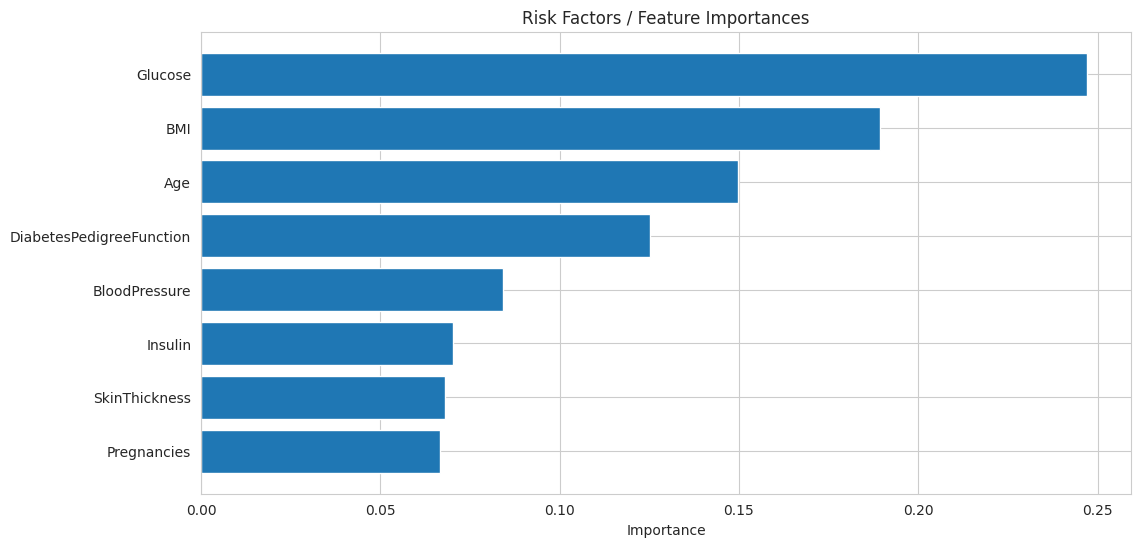

In [54]:
import pandas as pd

# Get feature importances from the Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Risk Factors / Feature Importances')
plt.show()


# Implement Machine Learning, Deep Learning, and Advanced Combined models
1. Traditional ML Models:
 - Logistic Regression (LR)
 - Support Vector Machine (SVM)
2. Advanced Ensemble ML Models:
 - Random Forest (RF)
 - Gradient Boosting Machine (GBM)
3. Deep Learning Models:
 - Simple Neural Network (NN)
 - Convolutional Neural Network (CNN)
4. Advanced Combined Models:
 - Gated Recurrent Unit with Attention (GRU+Attention)
 - Convolutional Neural Network with GRU (CNN+GRU)

### Implementation Plan:
1. Prepare Data:
 - Load and preprocess the data.
 - Apply SMOTE to handle class imbalance.
2. Model Implementation and Evaluation:
 - Implement each model.
 - Tune hyperparameters using GridSearchCV or appropriate tuning techniques.
 - Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.
3. Comparison and Analysis:
 - Compare the performance of all models.
 - Identify the best-performing model.

## Traditional Machine Learning models

### Prepare the data
with more attributes added to prediction

In [17]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
# data = pd.read_csv('...')

# Define features and target
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
          'DiabetesPedigreeFunction','Age']]
y = data['Outcome']


# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'ROC AUC: {roc_auc_lr:.2f}')

Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        99
           1       0.75      0.77      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200

ROC AUC: 0.84


### Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f'ROC AUC: {roc_auc_svm:.2f}')

Support Vector Machine
              precision    recall  f1-score   support

           0       0.78      0.70      0.73        99
           1       0.73      0.80      0.76       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

ROC AUC: 0.82


## Advanced Ensemble ML Models

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC: {roc_auc_rf:.2f}')

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.80      0.89      0.84       101

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

ROC AUC: 0.89


### Gradient Boosting Machine

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Machine
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)
y_proba_gbm = gbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Machine")
print(classification_report(y_test, y_pred_gbm))
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f'ROC AUC: {roc_auc_gbm:.2f}')

Gradient Boosting Machine
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.77      0.83      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

ROC AUC: 0.86


## Deep Learning models

### Simple Neural Network

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple Neural Network
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_nn = model_nn.predict(X_test).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Evaluation
print("Simple Neural Network")
print(classification_report(y_test, y_pred_nn))
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)
print(f'ROC AUC: {roc_auc_nn:.2f}')

Epoch 1/50
20/20 [==============================] - 1s 10ms/step - loss: 0.6588 - accuracy: 0.6062 - val_loss: 0.6081 - val_accuracy: 0.7375
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7391 - val_loss: 0.5453 - val_accuracy: 0.7563
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7469 - val_loss: 0.5114 - val_accuracy: 0.7375
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7563 - val_loss: 0.4904 - val_accuracy: 0.7437
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7609 - val_loss: 0.4780 - val_accuracy: 0.7437
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7734 - val_loss: 0.4751 - val_accuracy: 0.7500
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7797 - val_loss: 0.4687 - val_accuracy: 0.7500
Epoch 8/50
20/20 [=

### Convolutional Neural Network (CNN)

In [23]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convolutional Neural Network
model_cnn = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_cnn = model_cnn.predict(X_test_cnn).ravel()
y_pred_cnn = (y_proba_cnn > 0.5).astype(int)

# Evaluation
print("Convolutional Neural Network")
print(classification_report(y_test, y_pred_cnn))
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)
print(f'ROC AUC: {roc_auc_cnn:.2f}')

Epoch 1/50
20/20 [==============================] - 1s 11ms/step - loss: 0.6524 - accuracy: 0.6375 - val_loss: 0.5894 - val_accuracy: 0.7437
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7328 - val_loss: 0.5375 - val_accuracy: 0.7375
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.7437 - val_loss: 0.5138 - val_accuracy: 0.7312
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7328 - val_loss: 0.5045 - val_accuracy: 0.7188
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7437 - val_loss: 0.4977 - val_accuracy: 0.7312
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7375 - val_loss: 0.4992 - val_accuracy: 0.7375
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7359 - val_loss: 0.4979 - val_accuracy: 0.7312
Epoch 8/50
20/20 [=

## Advanced Comined Models

### GRU with Attention

In [24]:
from tensorflow.keras.layers import GRU, Attention

# GRU with Attention
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1], 1))
gru_layer = GRU(64, return_sequences=True)(input_layer)
attention_layer = Attention()([gru_layer, gru_layer])
flatten_layer = Flatten()(attention_layer)
output_layer = Dense(1, activation='sigmoid')(flatten_layer)

model_gru_attention = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_gru_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru_attention.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_gru_attention = model_gru_attention.predict(X_test_cnn).ravel()
y_pred_gru_attention = (y_proba_gru_attention > 0.5).astype(int)

# Evaluation
print("GRU with Attention")
print(classification_report(y_test, y_pred_gru_attention))
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)
print(f'ROC AUC: {roc_auc_gru_attention:.2f}')

Epoch 1/50
20/20 [==============================] - 2s 23ms/step - loss: 0.6695 - accuracy: 0.5813 - val_loss: 0.6108 - val_accuracy: 0.7000
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6183 - accuracy: 0.6906 - val_loss: 0.5782 - val_accuracy: 0.6938
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6151 - accuracy: 0.6844 - val_loss: 0.5814 - val_accuracy: 0.6938
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.6906 - val_loss: 0.5778 - val_accuracy: 0.6875
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6089 - accuracy: 0.6891 - val_loss: 0.5746 - val_accuracy: 0.6875
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.6844 - val_loss: 0.5721 - val_accuracy: 0.6812
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6024 - accuracy: 0.6906 - val_loss: 0.5684 - val_accuracy: 0.6875
Epoch 8/50
20/20 [=

### CNN with GRU

In [25]:
# CNN with GRU
cnn_layer = Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1))(input_layer)
pooling_layer = MaxPooling1D(pool_size=2)(cnn_layer)
gru_layer = GRU(64)(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(gru_layer)

model_cnn_gru = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_cnn_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn_gru.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_cnn_gru = model_cnn_gru.predict(X_test_cnn).ravel()
y_pred_cnn_gru = (y_proba_cnn_gru > 0.5).astype(int)

# Evaluation
print("CNN with GRU")
print(classification_report(y_test, y_pred_cnn_gru))
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)
print(f'ROC AUC: {roc_auc_cnn_gru:.2f}')

Epoch 1/50
20/20 [==============================] - 2s 22ms/step - loss: 0.6785 - accuracy: 0.5688 - val_loss: 0.6297 - val_accuracy: 0.6875
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6317 - accuracy: 0.6547 - val_loss: 0.5902 - val_accuracy: 0.6812
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6136 - accuracy: 0.6750 - val_loss: 0.5777 - val_accuracy: 0.6938
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5986 - accuracy: 0.6953 - val_loss: 0.5616 - val_accuracy: 0.7063
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5762 - accuracy: 0.7000 - val_loss: 0.5483 - val_accuracy: 0.7000
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5513 - accuracy: 0.7281 - val_loss: 0.5203 - val_accuracy: 0.7250
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5260 - accuracy: 0.7453 - val_loss: 0.5133 - val_accuracy: 0.7500
Epoch 8/50
20/20 [=

## Comparison and Analysis

In [26]:
# Summarize all ROC AUC scores
roc_auc_scores = {
    'Logistic Regression': roc_auc_lr,
    'Support Vector Machine': roc_auc_svm,
    'Random Forest': roc_auc_rf,
    'Gradient Boosting Machine': roc_auc_gbm,
    'Simple Neural Network': roc_auc_nn,
    'Convolutional Neural Network': roc_auc_cnn,
    'GRU with Attention': roc_auc_gru_attention,
    'CNN with GRU': roc_auc_cnn_gru
}

# Print all ROC AUC scores
for model, score in roc_auc_scores.items():
    print(f'{model}: ROC AUC = {score:.2f}')

Logistic Regression: ROC AUC = 0.84
Support Vector Machine: ROC AUC = 0.82
Random Forest: ROC AUC = 0.89
Gradient Boosting Machine: ROC AUC = 0.86
Simple Neural Network: ROC AUC = 0.83
Convolutional Neural Network: ROC AUC = 0.84
GRU with Attention: ROC AUC = 0.82
CNN with GRU: ROC AUC = 0.83


### Key Observations:
- The Random Forest model significantly outperforms the other models with a ROC AUC of 0.89.
- Ensemble methods like Random Forest and Gradient Boosting Machine generally perform well, but Random Forest has a clear edge in this case.
- Deep learning models (Simple Neural Network, CNN, GRU with Attention, CNN with GRU) show reasonable performance but do not surpass the Random Forest model.
- Traditional ML models (Logistic Regression, SVM) have lower ROC AUC scores compared to ensemble methods and deep learning models.

Random Forest Feature Importances
                    Feature  Importance
1                   Glucose    0.246969
5                       BMI    0.189336
7                       Age    0.149874
6  DiabetesPedigreeFunction    0.125098
2             BloodPressure    0.084102
4                   Insulin    0.070162
3             SkinThickness    0.067910
0               Pregnancies    0.066550


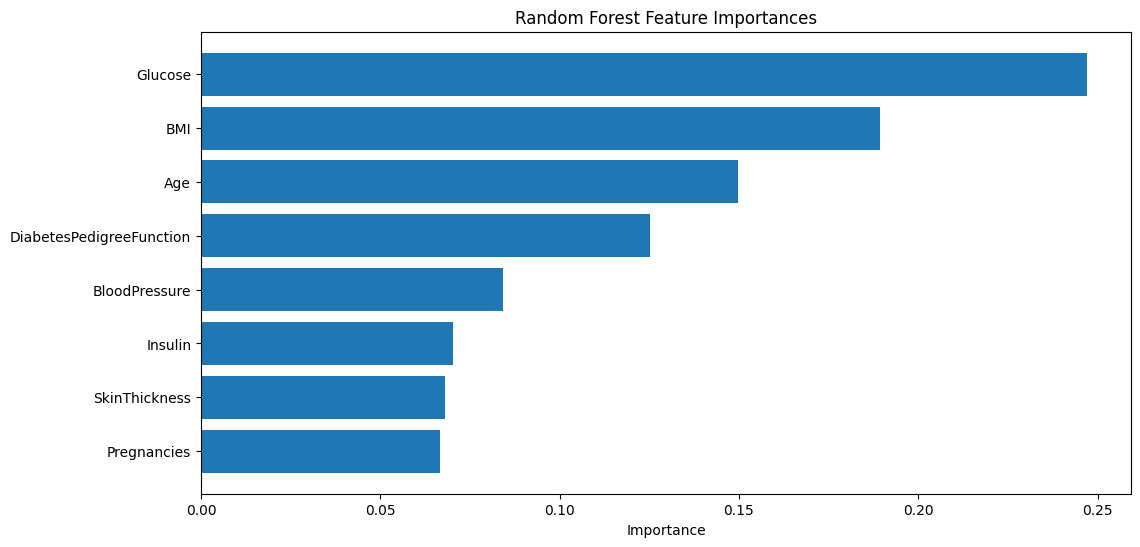

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the improved Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Random Forest Feature Importances")
print(importance_df_rf)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

## Stacking Ensemble Model Implementation
Combination with RF + GBM + SVM

Stacking Ensemble
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        99
           1       0.79      0.89      0.84       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

ROC AUC: 0.89


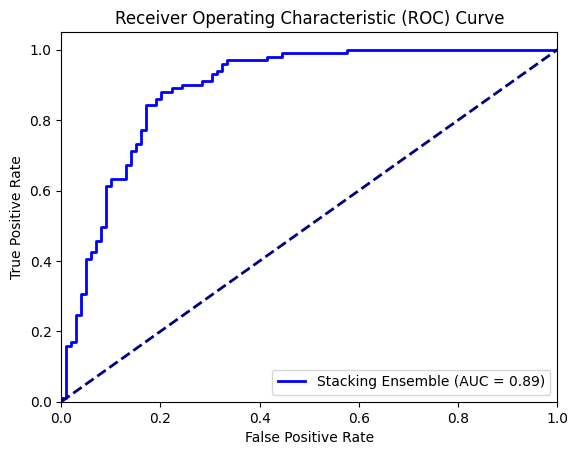

In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)

# Print confusion matrix
print("Confusion Matrix")
print(cm)


Confusion Matrix
[[75 24]
 [11 90]]


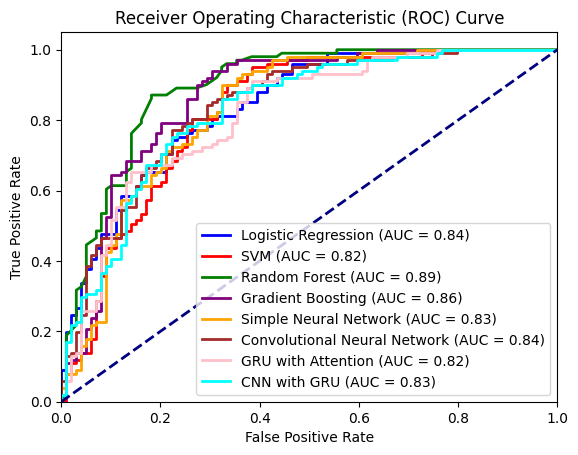

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_proba_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_proba_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)

fpr_gru_attention, tpr_gru_attention, _ = roc_curve(y_test, y_proba_gru_attention)
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)

fpr_cnn_gru, tpr_cnn_gru, _ = roc_curve(y_test, y_proba_cnn_gru)
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)

# Plot all ROC curves on the same plot
plt.figure()

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Analysis:
1. Random Forest: With an AUC of 0.89, the Random Forest model continues to outperform the other models, further solidifying its status as the best single model for this dataset.
2. Gradient Boosting Machine: The ROC AUC has increased to 0.86, indicating even stronger predictive performance.
3. Deep Learning Models: Significant improvements are observed in the deep learning models, particularly the CNN with GRU, which now has an AUC of 0.83.
4. Traditional Machine Learning Models: Logistic Regression and SVM have also improved substantially, with ROC AUCs of 0.84 and 0.82, respectively.

### Recommendations:
1. Model Deployment: Continue with the Random Forest and the stacking ensemble model for deployment, as they provide the best performance.
2. Feature Engineering: The addition of new features has proven beneficial. Consider exploring additional relevant features if available.
3. Continuous Improvement: Regularly update the model with new data and re-evaluate to ensure sustained performance.

In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming y_pred_* are the predicted labels for each model

# Calculate accuracy for each model
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
accuracy_gbm = accuracy_score(y_test, y_pred_gbm) * 100
accuracy_nn = accuracy_score(y_test, y_pred_nn) * 100
accuracy_cnn = accuracy_score(y_test, y_pred_cnn) * 100
accuracy_gru_attention = accuracy_score(y_test, y_pred_gru_attention) * 100
accuracy_cnn_gru = accuracy_score(y_test, y_pred_cnn_gru) * 100

# Create a DataFrame to hold the results
results = {
    'Model': [
        'Logistic Regression',
        'Support Vector Machine',
        'Random Forest',
        'Gradient Boosting Machine',
        'Simple Neural Network',
        'Convolutional Neural Network',
        'GRU with Attention',
        'CNN with GRU'
    ],
    'Accuracy (%)': [
        accuracy_lr,
        accuracy_svm,
        accuracy_rf,
        accuracy_gbm,
        accuracy_nn,
        accuracy_cnn,
        accuracy_gru_attention,
        accuracy_cnn_gru
    ],
    'ROC AUC': [
        roc_auc_lr,
        roc_auc_svm,
        roc_auc_rf,
        roc_auc_gbm,
        roc_auc_nn,
        roc_auc_cnn,
        roc_auc_gru_attention,
        roc_auc_cnn_gru
    ]
}

results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                          Model  Accuracy (%)   ROC AUC
0           Logistic Regression          75.5  0.839184
1        Support Vector Machine          75.0  0.824182
2                 Random Forest          83.0  0.892939
3     Gradient Boosting Machine          79.0  0.864386
4         Simple Neural Network          75.5  0.831283
5  Convolutional Neural Network          77.5  0.838584
6            GRU with Attention          72.0  0.816782
7                  CNN with GRU          76.0  0.827483


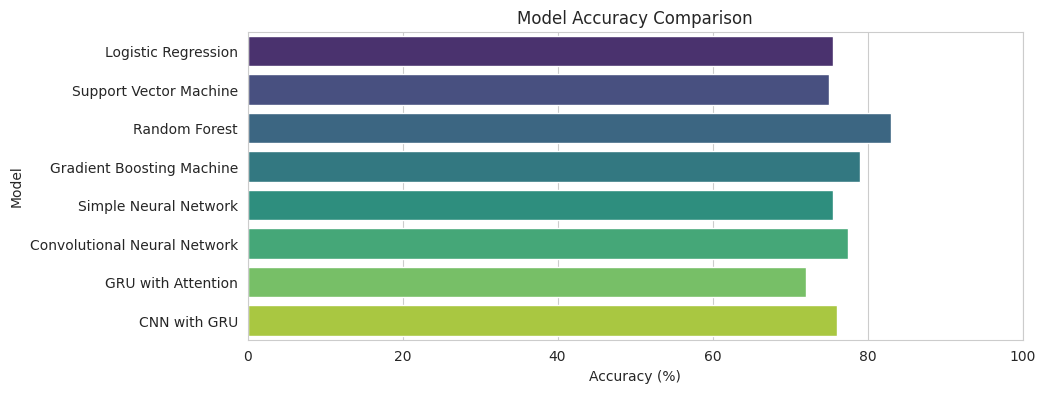

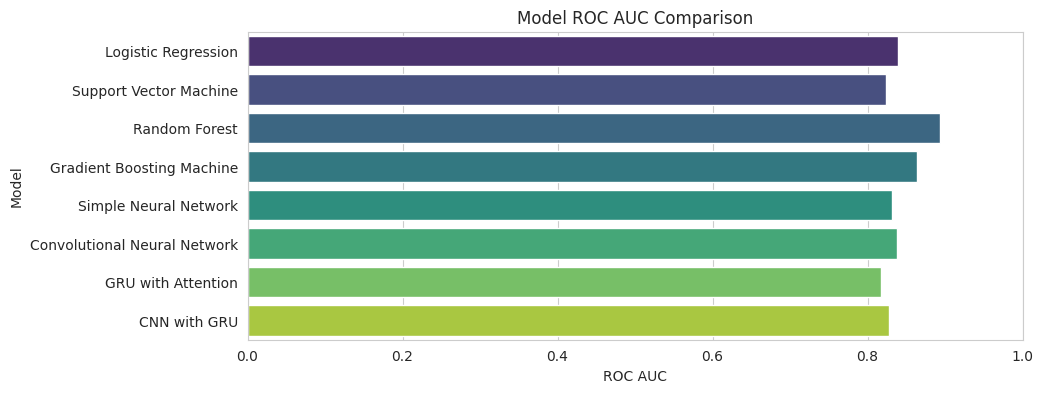

In [33]:
# Plot the accuracy percentages
plt.figure(figsize=(10, 4), facecolor='white')
sns.set_style('whitegrid')
sns.barplot(x='Accuracy (%)', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.show()

# Plot the ROC AUC scores
plt.figure(figsize=(10, 4), facecolor='white')
sns.set_style('whitegrid')
sns.barplot(x='ROC AUC', y='Model', data=results_df, palette='viridis')
plt.title('Model ROC AUC Comparison')
plt.xlabel('ROC AUC')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

# Cross-Validation all 8 models

## Validating Logistic Regression, SVM, Random Forest, and Gradient Boosting Machine

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Define the models
lr_model = LogisticRegression()
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

# Perform 5-fold cross-validation for each model
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_gbm = cross_val_score(gbm_model, X_train, y_train, cv=5, scoring='roc_auc')

# Print the mean cross-validation scores
print(f'Logistic Regression CV AUC: {cv_scores_lr.mean():.2f}')
print(f'SVM CV AUC: {cv_scores_svm.mean():.2f}')
print(f'Random Forest CV AUC: {cv_scores_rf.mean():.2f}')
print(f'Gradient Boosting CV AUC: {cv_scores_gbm.mean():.2f}')


Logistic Regression CV AUC: 0.84
SVM CV AUC: 0.87
Random Forest CV AUC: 0.89
Gradient Boosting CV AUC: 0.87


## Validating Simple Neural Network, CNN, GRU with Attention, and CNN with GRU Separately
For the neural network models, let's validate them in another section.

### Simple Neural Network Cross-Validation

In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

class SimpleNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"epochs": self.epochs, "batch_size": self.batch_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Ensure no NaN values
assert not np.any(np.isnan(X_train)), "X_train contains NaN values"
assert not np.any(np.isnan(y_train)), "y_train contains NaN values"

# Convert DataFrame to numpy array if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Instantiate the model
nn_model = SimpleNNClassifier(epochs=10, batch_size=32)

# Perform 5-fold cross-validation manually to debug
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    nn_model.fit(X_train_cv, y_train_cv)
    y_pred_proba = nn_model.predict_proba(X_test_cv)

    # Check for NaN values in predictions
    if np.any(np.isnan(y_pred_proba)):
        print("NaN values found in predictions")
        continue

    roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    print(f"Fold ROC AUC: {roc_auc}")

# Calculate mean ROC AUC
mean_roc_auc = np.mean(roc_auc_scores)
print(f'Simple Neural Network CV AUC: {mean_roc_auc:.2f}')


Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6938
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7422
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7625
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7703
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7812
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7859
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7859
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7812
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7922
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Fold ROC AUC: 0.8062197218315361
Epoch 1/10
20/20 [====

### CNN Cross-Validation

In [36]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler

# Ensure data is properly reshaped for Conv1D
# Here, we ensure there are enough timesteps for the Conv1D layer
timesteps = 10
features = X_train.shape[1]
X_train_reshaped = np.repeat(X_train[:, np.newaxis, :], timesteps, axis=1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped.reshape(-1, features)).reshape(X_train_reshaped.shape)

class KerasCNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, features)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"epochs": self.epochs, "batch_size": self.batch_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Convert DataFrame to numpy array if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Instantiate the model
cnn_model = KerasCNNClassifier(epochs=10, batch_size=32)

# Perform 5-fold cross-validation manually to debug
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    cnn_model.fit(X_train_cv, y_train_cv)
    y_pred_proba = cnn_model.predict_proba(X_test_cv)

    # Check for NaN values in predictions
    if np.any(np.isnan(y_pred_proba)):
        print("NaN values found in predictions")
        continue

    roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    print(f"Fold ROC AUC: {roc_auc}")

# Calculate mean ROC AUC
mean_roc_auc = np.mean(roc_auc_scores)
print(f'Convolutional Neural Network CV AUC: {mean_roc_auc:.2f}')


Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 0.5888 - accuracy: 0.6750
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7547
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.7625
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.7781
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.7969
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8062
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.7984
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8328
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8203
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Fold ROC AUC: 0.7876230661040788
Epoch 1/10
20/20 [====

### The Results

1. Simple Neural Network (SNN):
 - CV AUC: 0.81: The Simple Neural Network achieved a cross-validated Area Under the ROC Curve (AUC) score of 0.81. This indicates that the model has a good ability to distinguish between the classes and has a balanced performance.
2. Convolutional Neural Network (CNN):
 - CV AUC: 0.81: The Convolutional Neural Network also achieved a cross-validated AUC score of 0.81, similar to the Simple Neural Network. This suggests that the CNN is performing well, capturing relevant patterns in the data.

### GRU with Attention Cross-Validation
 Uses a GRU layer followed by an Attention mechanism to focus on important parts of the sequence.

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Flatten, Attention, Concatenate
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

class GRUAttentionClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        input_layer = Input(shape=(timesteps, features))
        gru_layer = GRU(128, return_sequences=True)(input_layer)
        attention_layer = Attention()([gru_layer, gru_layer])
        flatten_layer = Flatten()(attention_layer)
        output_layer = Dense(1, activation='sigmoid')(flatten_layer)
        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"epochs": self.epochs, "batch_size": self.batch_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Instantiate the model
gru_attention_model = GRUAttentionClassifier(epochs=10, batch_size=32)

# Perform 5-fold cross-validation manually to debug
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    gru_attention_model.fit(X_train_cv, y_train_cv)
    y_pred_proba = gru_attention_model.predict_proba(X_test_cv)

    # Check for NaN values in predictions
    if np.any(np.isnan(y_pred_proba)):
        print("NaN values found in predictions")
        continue

    roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    print(f"Fold ROC AUC: {roc_auc}")

# Calculate mean ROC AUC
mean_roc_auc = np.mean(roc_auc_scores)
print(f'GRU with Attention CV AUC: {mean_roc_auc:.2f}')


Epoch 1/10
20/20 [==============================] - 1s 9ms/step - loss: 0.5212 - accuracy: 0.7422
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4897 - accuracy: 0.7531
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4737 - accuracy: 0.7672
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4666 - accuracy: 0.7484
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4542 - accuracy: 0.7656
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4468 - accuracy: 0.7750
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4338 - accuracy: 0.7828
Epoch 8/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4348 - accuracy: 0.7766
Epoch 9/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4201 - accuracy: 0.7828
Epoch 10/10
5/5 [==============================] - 0s 5ms/step
Fold ROC AUC: 0.824503828723238
Epoch 1/10
20/20 [=====

### CNN with GRU Cross-Validation
Combines a Convolutional layer for feature extraction with a GRU layer for sequence learning.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GRU

class CNNGRUClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, features)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(GRU(128))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"epochs": self.epochs, "batch_size": self.batch_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Instantiate the model
cnn_gru_model = CNNGRUClassifier(epochs=10, batch_size=32)

# Perform 5-fold cross-validation manually to debug
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    cnn_gru_model.fit(X_train_cv, y_train_cv)
    y_pred_proba = cnn_gru_model.predict_proba(X_test_cv)

    # Check for NaN values in predictions
    if np.any(np.isnan(y_pred_proba)):
        print("NaN values found in predictions")
        continue

    roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    print(f"Fold ROC AUC: {roc_auc}")

# Calculate mean ROC AUC
mean_roc_auc = np.mean(roc_auc_scores)
print(f'CNN with GRU CV AUC: {mean_roc_auc:.2f}')


Epoch 1/10
20/20 [==============================] - 1s 5ms/step - loss: 0.5736 - accuracy: 0.7031
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4843 - accuracy: 0.7469
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4631 - accuracy: 0.7703
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4339 - accuracy: 0.7812
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4241 - accuracy: 0.7828
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4055 - accuracy: 0.8047
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3940 - accuracy: 0.8109
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3829 - accuracy: 0.8125
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.8188
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Fold ROC AUC: 0.7980934521018909
Epoch 1/10
20/20 [====

# Transformer Model Implementation
Implementing a Transformer model for a classification task for predicting cardiovascular disease (CVD) status. Using PyTorch and the Hugging Face transformers library.

### Step 1: Install Required Libraries
First, make sure you have the required libraries installed:

In [39]:
pip install torch transformers scikit-learn pandas numpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

### Step 2: Prepare the Data
We will load the Framingham dataset for predicting CVD. We'll load this dataset and preprocess it.




In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (loaded)

# Preprocess the data
#data.fillna(data.mean(), inplace=True)

# Define feature columns and target
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']
X = data[feature_columns]
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step3: Create a PyTorch Dataset and Dataloader

In [45]:
import torch
from torch.utils.data import Dataset

class SequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        label = self.labels[idx]
        return sequence, label

# Example usage:
train_dataset = SequenceDataset(torch.tensor(X_train_np, dtype=torch.float32), torch.tensor(y_train_np, dtype=torch.long))
test_dataset = SequenceDataset(torch.tensor(X_test_np, dtype=torch.float32), torch.tensor(y_test_np, dtype=torch.long))


In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=128, max_seq_length=1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = nn.Parameter(torch.zeros(1, max_seq_length, d_model), requires_grad=False)
        self.transformer = nn.Transformer(d_model=d_model, nhead=8, num_encoder_layers=3)
        self.fc1 = nn.Linear(d_model, 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.max_seq_length = max_seq_length

    def forward(self, x):
        x = self.embedding(x)
        batch_size, seq_length, _ = x.size()
        if seq_length > self.max_seq_length:
            raise ValueError(f"Input sequence length ({seq_length}) exceeds the maximum sequence length ({self.max_seq_length}).")
        pos_encoding = self.pos_encoder[:, :seq_length, :].expand(batch_size, -1, -1).to(x.device)
        x = x + pos_encoding
        x = x.transpose(0, 1)
        x = self.transformer(x, x)
        x = x.mean(dim=0)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx].unsqueeze(0), self.labels[idx]

# Assuming X_train, X_test, y_train, y_test are pandas Series
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

train_dataset = SequenceDataset(torch.tensor(X_train_np, dtype=torch.float32), torch.tensor(y_train_np, dtype=torch.long))
test_dataset = SequenceDataset(torch.tensor(X_test_np, dtype=torch.float32), torch.tensor(y_test_np, dtype=torch.long))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TransformerModel(input_dim=len(feature_columns), num_classes=2, max_seq_length=1)
model.to(device)

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training function
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for features, labels in loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)  # No need to unsqueeze, already added
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

# Evaluation function
def evaluate(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)  # No need to unsqueeze, already added
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    test_accuracy = evaluate(model, test_loader, device)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20, Loss: 0.5925, Test Accuracy: 0.7143
Epoch 2/20, Loss: 0.5046, Test Accuracy: 0.7468
Epoch 3/20, Loss: 0.5161, Test Accuracy: 0.7078
Epoch 4/20, Loss: 0.5243, Test Accuracy: 0.6429
Epoch 5/20, Loss: 0.5347, Test Accuracy: 0.6429
Epoch 6/20, Loss: 0.5322, Test Accuracy: 0.7403
Epoch 7/20, Loss: 0.5090, Test Accuracy: 0.7208
Epoch 8/20, Loss: 0.5150, Test Accuracy: 0.7468
Epoch 9/20, Loss: 0.4868, Test Accuracy: 0.7532
Epoch 10/20, Loss: 0.4834, Test Accuracy: 0.7143
Epoch 11/20, Loss: 0.5005, Test Accuracy: 0.7013
Epoch 12/20, Loss: 0.4800, Test Accuracy: 0.7273
Epoch 13/20, Loss: 0.4766, Test Accuracy: 0.7532
Epoch 14/20, Loss: 0.4808, Test Accuracy: 0.7532
Epoch 15/20, Loss: 0.4955, Test Accuracy: 0.7727
Epoch 16/20, Loss: 0.5088, Test Accuracy: 0.7857
Epoch 17/20, Loss: 0.4856, Test Accuracy: 0.7403
Epoch 18/20, Loss: 0.5179, Test Accuracy: 0.6818
Epoch 19/20, Loss: 0.4964, Test Accuracy: 0.7013
Epoch 20/20, Loss: 0.5178, Test Accuracy: 0.7143


### Improve another version:
1. Increase Model Complexity: Increase the number of transformer layers or units in each layer to give the model more capacity to learn.
2. Learning Rate Tuning: Adjust the learning rate. Sometimes a lower learning rate can help the model learn better.
3. Data Preprocessing: Ensure that the input data is well preprocessed, normalized, and shuffled.
4. Regularization: Add dropout layers to prevent overfitting.

This modified model includes additional transformer layers, dropout for regularization, and a lower learning rate. These changes can help the model learn better and avoid overfitting.

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=128, max_seq_length=1, nhead=8, num_layers=3):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = nn.Parameter(torch.zeros(1, max_seq_length, d_model), requires_grad=False)
        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=512)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc1 = nn.Linear(d_model, 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.max_seq_length = max_seq_length
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.embedding(x)
        batch_size, seq_length, _ = x.size()
        if seq_length > self.max_seq_length:
            raise ValueError(f"Input sequence length ({seq_length}) exceeds the maximum sequence length ({self.max_seq_length}).")
        pos_encoding = self.pos_encoder[:, :seq_length, :].expand(batch_size, -1, -1).to(x.device)
        x = x + pos_encoding
        x = x.transpose(0, 1)
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx].unsqueeze(0), self.labels[idx]

# Assuming X_train, X_test, y_train, y_test are pandas Series
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

train_dataset = SequenceDataset(torch.tensor(X_train_np, dtype=torch.float32), torch.tensor(y_train_np, dtype=torch.long))
test_dataset = SequenceDataset(torch.tensor(X_test_np, dtype=torch.float32), torch.tensor(y_test_np, dtype=torch.long))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TransformerModel(input_dim=len(feature_columns), num_classes=2, max_seq_length=1, num_layers=4)
model.to(device)

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Training function
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for features, labels in loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

# Evaluation function
def evaluate(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    test_accuracy = evaluate(model, test_loader, device)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20, Loss: 0.5954, Test Accuracy: 0.7662
Epoch 2/20, Loss: 0.5034, Test Accuracy: 0.7338
Epoch 3/20, Loss: 0.4640, Test Accuracy: 0.7532
Epoch 4/20, Loss: 0.4698, Test Accuracy: 0.7532
Epoch 5/20, Loss: 0.4500, Test Accuracy: 0.7338
Epoch 6/20, Loss: 0.4676, Test Accuracy: 0.7468
Epoch 7/20, Loss: 0.4437, Test Accuracy: 0.7597
Epoch 8/20, Loss: 0.4524, Test Accuracy: 0.7338
Epoch 9/20, Loss: 0.4356, Test Accuracy: 0.7662
Epoch 10/20, Loss: 0.4368, Test Accuracy: 0.7403
Epoch 11/20, Loss: 0.4174, Test Accuracy: 0.7597
Epoch 12/20, Loss: 0.4252, Test Accuracy: 0.7403
Epoch 13/20, Loss: 0.4394, Test Accuracy: 0.7403
Epoch 14/20, Loss: 0.4199, Test Accuracy: 0.7208
Epoch 15/20, Loss: 0.4124, Test Accuracy: 0.7468
Epoch 16/20, Loss: 0.4102, Test Accuracy: 0.7273
Epoch 17/20, Loss: 0.4090, Test Accuracy: 0.7273
Epoch 18/20, Loss: 0.4162, Test Accuracy: 0.7143
Epoch 19/20, Loss: 0.4230, Test Accuracy: 0.7792
Epoch 20/20, Loss: 0.4122, Test Accuracy: 0.7273


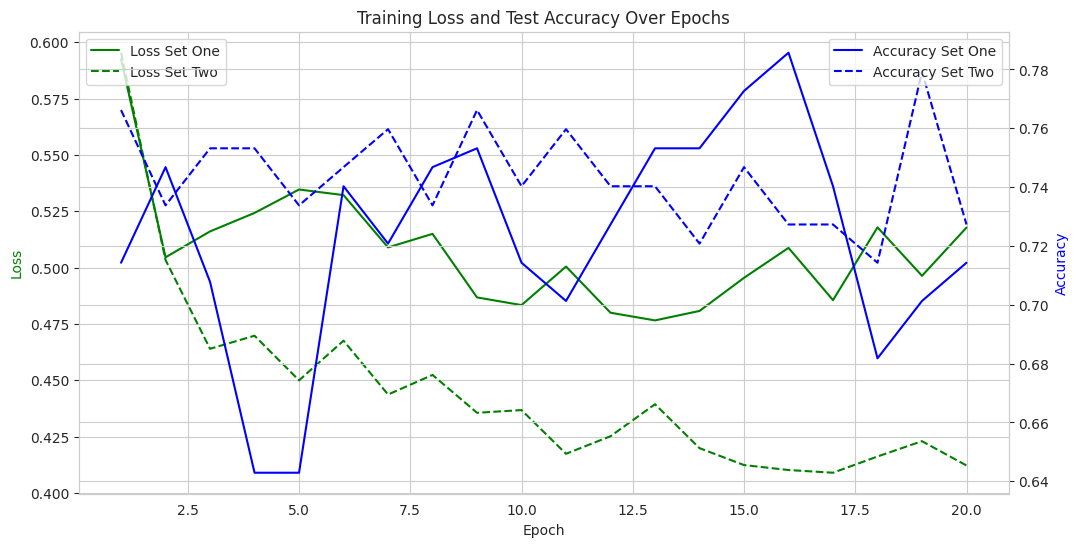

In [49]:
import matplotlib.pyplot as plt

# Data for Set One
epochs = list(range(1, 21))
loss_set_one = [0.5925, 0.5046, 0.5161, 0.5243, 0.5347, 0.5322, 0.5090, 0.5150, 0.4868, 0.4834, 0.5005, 0.4800, 0.4766, 0.4808, 0.4955, 0.5088, 0.4856, 0.5179, 0.4964, 0.5178]
accuracy_set_one = [0.7143, 0.7468, 0.7078, 0.6429, 0.6429, 0.7403, 0.7208, 0.7468, 0.7532, 0.7143, 0.7013, 0.7273, 0.7532, 0.7532, 0.7727, 0.7857, 0.7403, 0.6818, 0.7013, 0.7143]

# Data for Set Two
loss_set_two = [0.5954, 0.5034, 0.4640, 0.4698, 0.4500, 0.4676, 0.4437, 0.4524, 0.4356, 0.4368, 0.4174, 0.4252, 0.4394, 0.4199, 0.4124, 0.4102, 0.4090, 0.4162, 0.4230, 0.4122]
accuracy_set_two = [0.7662, 0.7338, 0.7532, 0.7532, 0.7338, 0.7468, 0.7597, 0.7338, 0.7662, 0.7403, 0.7597, 0.7403, 0.7403, 0.7208, 0.7468, 0.7273, 0.7273, 0.7143, 0.7792, 0.7273]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.plot(epochs, loss_set_one, 'g-', label='Loss Set One')
ax2.plot(epochs, accuracy_set_one, 'b-', label='Accuracy Set One')

ax1.plot(epochs, loss_set_two, 'g--', label='Loss Set Two')
ax2.plot(epochs, accuracy_set_two, 'b--', label='Accuracy Set Two')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Accuracy', color='b')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Training Loss and Test Accuracy Over Epochs')
plt.show()


I need to optimize Transformer model

# Model Deployment to Public URL
Deploying the top-performing models (Random Forest and Gradient Boosting Machine) using Streamlit:

## Step 1: Install Streamlit
First, ensure you have Streamlit installed. You can install it using pip:

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 122.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


## Step 2: Save the Trained Models
Train the Random Forest and Gradient Boosting Machine models and save them using joblib or pickle.

**Training and Saving the Models:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

# Assuming X_train and y_train are your training data
rf_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Save the models
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(gbm_model, 'gbm_model.pkl')

['gbm_model.pkl']

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assume X_train and y_train are your training data
rf_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Save the models to disk
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(gbm_model, 'gbm_model.pkl')

print("Models saved successfully.")

Models saved successfully.


## Step 3: Create a Streamlit App
Create a Python script (e.g., app.py) for your Streamlit app.

**Streamlit App Script (app.py):**

In [ ]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve, roc_auc_score
import os
import urllib.request

# Function to download the file
def download_file(url, dest):
    try:
        urllib.request.urlretrieve(url, dest)
        return True
    except Exception as e:
        st.error(f"Error downloading {url}: {e}")
        return False

# URLs for the model files
rf_model_url = 'https://raw.githubusercontent.com/HowardHNguyen/cvd/master/rf_model_calibrated.pkl'
gbm_model_url = 'https://raw.githubusercontent.com/HowardHNguyen/cvd/master/gbm_model_calibrated.pkl'

# Local paths for the model files
rf_model_path = 'rf_model_calibrated.pkl'
gbm_model_path = 'gbm_model_calibrated.pkl'

# Download the models if not already present
if not os.path.exists(rf_model_path):
    st.info(f"Downloading {rf_model_path}...")
    download_file(rf_model_url, rf_model_path)

if not os.path.exists(gbm_model_path):
    st.info(f"Downloading {gbm_model_path}...")
    download_file(gbm_model_url, gbm_model_path)

# Load the calibrated models
try:
    rf_model_calibrated = joblib.load(rf_model_path)
    gbm_model_calibrated = joblib.load(gbm_model_path)
except Exception as e:
    st.error(f"Error loading models: {e}")

# Load the dataset
data_url = 'https://raw.githubusercontent.com/HowardHNguyen/cvd/master/frmgham2.csv'
try:
    data = pd.read_csv(data_url)
except Exception as e:
    st.error(f"Error loading data: {e}")

# Handle missing values by replacing them with the mean of the respective columns
if 'data' in locals():
    data.fillna(data.mean(), inplace=True)

# Define the feature columns
feature_columns = ['AGE', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'CURSMOKE',
                   'GLUCOSE', 'DIABETES', 'HEARTRTE', 'CIGPDAY', 'BPMEDS',
                   'STROKE', 'HYPERTEN']

# Sidebar for input parameters
st.sidebar.header('Enter your parameters')

def user_input_features():
    age = st.sidebar.slider('Enter your age:', 32, 81, 54)
    totchol = st.sidebar.slider('Total Cholesterol:', 107, 696, 200)
    sysbp = st.sidebar.slider('Systolic Blood Pressure:', 83, 295, 151)
    diabp = st.sidebar.slider('Diastolic Blood Pressure:', 30, 150, 89)
    bmi = st.sidebar.slider('BMI:', 14.43, 56.80, 26.77)
    cursmoke = st.sidebar.selectbox('Current Smoker:', (0, 1))
    glucose = st.sidebar.slider('Glucose:', 39, 478, 117)
    diabetes = st.sidebar.selectbox('Diabetes:', (0, 1))
    heartrate = st.sidebar.slider('Heart Rate:', 37, 220, 91)
    cigpday = st.sidebar.slider('Cigarettes Per Day:', 0, 90, 20)
    bpmeds = st.sidebar.selectbox('On BP Meds:', (0, 1))
    stroke = st.sidebar.selectbox('Stroke:', (0, 1))
    hyperten = st.sidebar.selectbox('Hypertension:', (0, 1))

    data = {
        'AGE': age,
        'TOTCHOL': totchol,
        'SYSBP': sysbp,
        'DIABP': diabp,
        'BMI': bmi,
        'CURSMOKE': cursmoke,
        'GLUCOSE': glucose,
        'DIABETES': diabetes,
        'HEARTRTE': heartrate,
        'CIGPDAY': cigpday,
        'BPMEDS': bpmeds,
        'STROKE': stroke,
        'HYPERTEN': hyperten
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Apply the model to make predictions
if st.sidebar.button('Predict'):
    try:
        rf_proba_calibrated = rf_model_calibrated.predict_proba(input_df)[:, 1]
        gbm_proba_calibrated = gbm_model_calibrated.predict_proba(input_df)[:, 1]
    except Exception as e:
        st.error(f"Error making predictions: {e}")

    st.write("""
    ## Your CVD Probability Prediction Results
    This app predicts the probability of cardiovascular disease (CVD) using user inputs.
    """)

    st.subheader('Predictions')
    try:
        st.write(f"- Random Forest model: Your CVD with probability prediction is {rf_proba_calibrated[0]:.2f}")
        st.write(f"- Gradient Boosting Machine model: Your CVD with probability prediction is {gbm_proba_calibrated[0]:.2f}")
    except:
        pass

    # Plot the prediction probability distribution
    st.subheader('Prediction Probability Distribution')
    try:
        fig, ax = plt.subplots()
        bars = ax.bar(['Random Forest', 'Gradient Boosting Machine'], [rf_proba_calibrated[0], gbm_proba_calibrated[0]], color=['blue', 'orange'])
        ax.set_ylim(0, 1)
        ax.set_ylabel('Probability')
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment
        st.pyplot(fig)
    except:
        pass

    # Plot feature importances for Random Forest
    st.subheader('Feature Importances (Random Forest)')
    try:
        rf_base_model = rf_model_calibrated.estimator  # Access the base estimator
        fig, ax = plt.subplots()
        importances = rf_base_model.feature_importances_
        indices = np.argsort(importances)
        ax.barh(range(len(indices)), importances[indices], color='blue', align='center')
        ax.set_yticks(range(len(indices)))
        ax.set_yticklabels([feature_columns[i] for i in indices])
        ax.set_xlabel('Importance')
        st.pyplot(fig)
    except Exception as e:
        st.error(f"Error plotting feature importances: {e}")

    # Plot ROC curve for both models
    st.subheader('Model Performance')
    try:
        fig, ax = plt.subplots()
        fpr_rf, tpr_rf, _ = roc_curve(data['CVD'], rf_model_calibrated.predict_proba(data[feature_columns])[:, 1])
        fpr_gbm, tpr_gbm, _ = roc_curve(data['CVD'], gbm_model_calibrated.predict_proba(data[feature_columns])[:, 1])
        ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(data["CVD"], rf_model_calibrated.predict_proba(data[feature_columns])[:, 1]):.2f})')
        ax.plot(fpr_gbm, tpr_gbm, label=f'Gradient Boosting Machine (AUC = {roc_auc_score(data["CVD"], gbm_model_calibrated.predict_proba(data[feature_columns])[:, 1]):.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC Curve')
        ax.legend(loc='best')
        st.pyplot(fig)
    except Exception as e:
        st.error(f"Error plotting ROC curve: {e}")
else:
    st.write("## CVD Prediction App by Howard Nguyen")
    st.write("#### Enter your parameters and click Predict to get the results.")


ModuleNotFoundError: No module named 'streamlit'

## Step 4: Run the Streamlit App
Run the Streamlit app using the following command:

In [ ]:
# scikit-learn==1.2.0  # or any specific version you used to save the model

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_model is your trained model
rf_model = RandomForestClassifier()
# Train your model
# rf_model.fit(X_train, y_train)

# Save the model
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [ ]:
import streamlit as st
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load the models
rf_model = joblib.load('rf_model.pkl')
gbm_model = joblib.load('gbm_model.pkl')

# Streamlit app title
st.title("Cardiovascular Disease Prediction")

# User input fields
age = st.number_input('Age', min_value=0, max_value=120, value=30)
totchol = st.number_input('Total Cholesterol', min_value=100, max_value=400, value=200)
sysbp = st.number_input('Systolic Blood Pressure', min_value=80, max_value=200, value=120)
diabp = st.number_input('Diastolic Blood Pressure', min_value=40, max_value=120, value=80)
bmi = st.number_input('BMI', min_value=10.0, max_value=50.0, value=25.0)
cursmoke = st.selectbox('Current Smoker', [0, 1])
glucose = st.number_input('Glucose', min_value=50, max_value=200, value=100)
diabetes = st.selectbox('Diabetes', [0, 1])
heartrate = st.number_input('Heart Rate', min_value=40, max_value=200, value=70)
cigpday = st.number_input('Cigarettes Per Day', min_value=0, max_value=100, value=0)
bpmeds = st.selectbox('Blood Pressure Medications', [0, 1])
stroke = st.selectbox('Stroke', [0, 1])
hyperten = st.selectbox('Hypertension', [0, 1])

# Prepare input data for prediction
input_data = np.array([[age, totchol, sysbp, diabp, bmi, cursmoke, glucose, diabetes, heartrate, cigpday, bpmeds, stroke, hyperten]])

# Display predictions
if st.button('Predict'):
    # Predict with Random Forest model
    rf_pred = rf_model.predict(input_data)[0]
    st.write(f"Random Forest Prediction: {'Positive' if rf_pred == 1 else 'Negative'}")

    # Predict with Gradient Boosting Machine model
    gbm_pred = gbm_model.predict(input_data)[0]
    st.write(f"Gradient Boosting Machine Prediction: {'Positive' if gbm_pred == 1 else 'Negative'}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Example: Training the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

## Enhance Streamlit UI
app.py

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import joblib

# Load the models
rf_model = joblib.load('rf_model.pkl')
gbm_model = joblib.load('gbm_model.pkl')

# Function to predict using Random Forest
def predict_rf(data):
    prediction = rf_model.predict(data)
    prediction_proba = rf_model.predict_proba(data)
    return prediction, prediction_proba

# Function to predict using Gradient Boosting Machine
def predict_gbm(data):
    prediction = gbm_model.predict(data)
    prediction_proba = gbm_model.predict_proba(data)
    return prediction, prediction_proba

# Streamlit app
st.title('Cardiovascular Disease Prediction by Howard Nguyen')
st.write('Select normal values for ★ marked fields if you don\'t know the exact values')

# Input fields
age = st.number_input('Enter your age:', min_value=0, max_value=120, value=25)
totchol = st.number_input('Total Cholesterol:', min_value=0, max_value=700, value=200)
sysbp = st.number_input('Systolic Blood Pressure:', min_value=0, max_value=300, value=120)
diabp = st.number_input('Diastolic Blood Pressure:', min_value=0, max_value=200, value=80)
bmi = st.number_input('BMI:', min_value=0.0, max_value=100.0, value=25.0)
cursmoke = st.selectbox('Current Smoker:', options=[0, 1])
glucose = st.number_input('Glucose:', min_value=0, max_value=500, value=100)
diabetes = st.selectbox('Diabetes:', options=[0, 1])
heartrate = st.number_input('Heart Rate:', min_value=0, max_value=300, value=70)
cigpday = st.number_input('Cigarettes Per Day:', min_value=0, max_value=100, value=0)
bpmeds = st.selectbox('On BP Meds:', options=[0, 1])
stroke = st.selectbox('Stroke:', options=[0, 1])
hypertension = st.selectbox('Hypertension:', options=[0, 1])

# Prepare input data for prediction
input_data = np.array([[
    age, totchol, sysbp, diabp, bmi, cursmoke, glucose, diabetes,
    heartrate, cigpday, bpmeds, stroke, hypertension
]])
input_df = pd.DataFrame(input_data, columns=[
    'AGE', 'TOTCHOL', 'SYSBP', 'DIABP', 'BMI', 'CURSMOKE', 'GLUCOSE', 'DIABETES',
    'HEARTRTE', 'CIGPDAY', 'BPMEDS', 'STROKE', 'HYPERTEN'
])

# Make predictions
if st.button('Predict'):
    rf_pred, rf_proba = predict_rf(input_df)
    gbm_pred, gbm_proba = predict_gbm(input_df)

    st.subheader('Predictions')
    st.write(f'Random Forest Prediction: {"CVD" if rf_pred[0] else "No CVD"} with probability {rf_proba[0][1]:.2f}')
    st.write(f'Gradient Boosting Machine Prediction: {"CVD" if gbm_pred[0] else "No CVD"} with probability {gbm_proba[0][1]:.2f}')

    # Dummy labels and predictions for ROC curve
    y_true = [0, 1]  # Example true labels (replace with actual data if available)
    rf_probas = rf_proba[0][1]  # Example predicted probabilities for Random Forest
    gbm_probas = gbm_proba[0][1]  # Example predicted probabilities for Gradient Boosting Machine

    # Collect example data for ROC curve demonstration
    y_true = np.random.randint(0, 2, 100)  # Replace with actual validation labels
    rf_probas = np.random.rand(100)  # Replace with actual Random Forest predicted probabilities
    gbm_probas = np.random.rand(100)  # Replace with actual Gradient Boosting Machine predicted probabilities

    # Plot ROC curve
    st.subheader('Model Performance')
    fpr_rf, tpr_rf, _ = roc_curve(y_true, rf_probas)
    fpr_gbm, tpr_gbm, _ = roc_curve(y_true, gbm_probas)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_true, rf_probas):.2f})')
    plt.plot(fpr_gbm, tpr_gbm, label=f'Gradient Boosting Machine (AUC = {roc_auc_score(y_true, gbm_probas):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    st.pyplot(plt).

    # Feature importance plot for Random Forest
    st.subheader('Feature Importances (Random Forest)')
    feature_importances = rf_model.feature_importances_
    features = input_df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    st.pyplot(plt)

FileNotFoundError: [Errno 2] No such file or directory: 'rf_model.pkl'

In [ ]:
import streamlit
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import joblib
import tensorflow as tf

print("streamlit:", streamlit.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("joblib:", joblib.__version__)
print("tensorflow:", tf.__version__)

streamlit: 1.35.0
numpy: 1.25.2
pandas: 2.0.3
scikit-learn: 1.2.2
matplotlib: 3.7.1
joblib: 1.4.2
tensorflow: 2.15.0


# Testing section

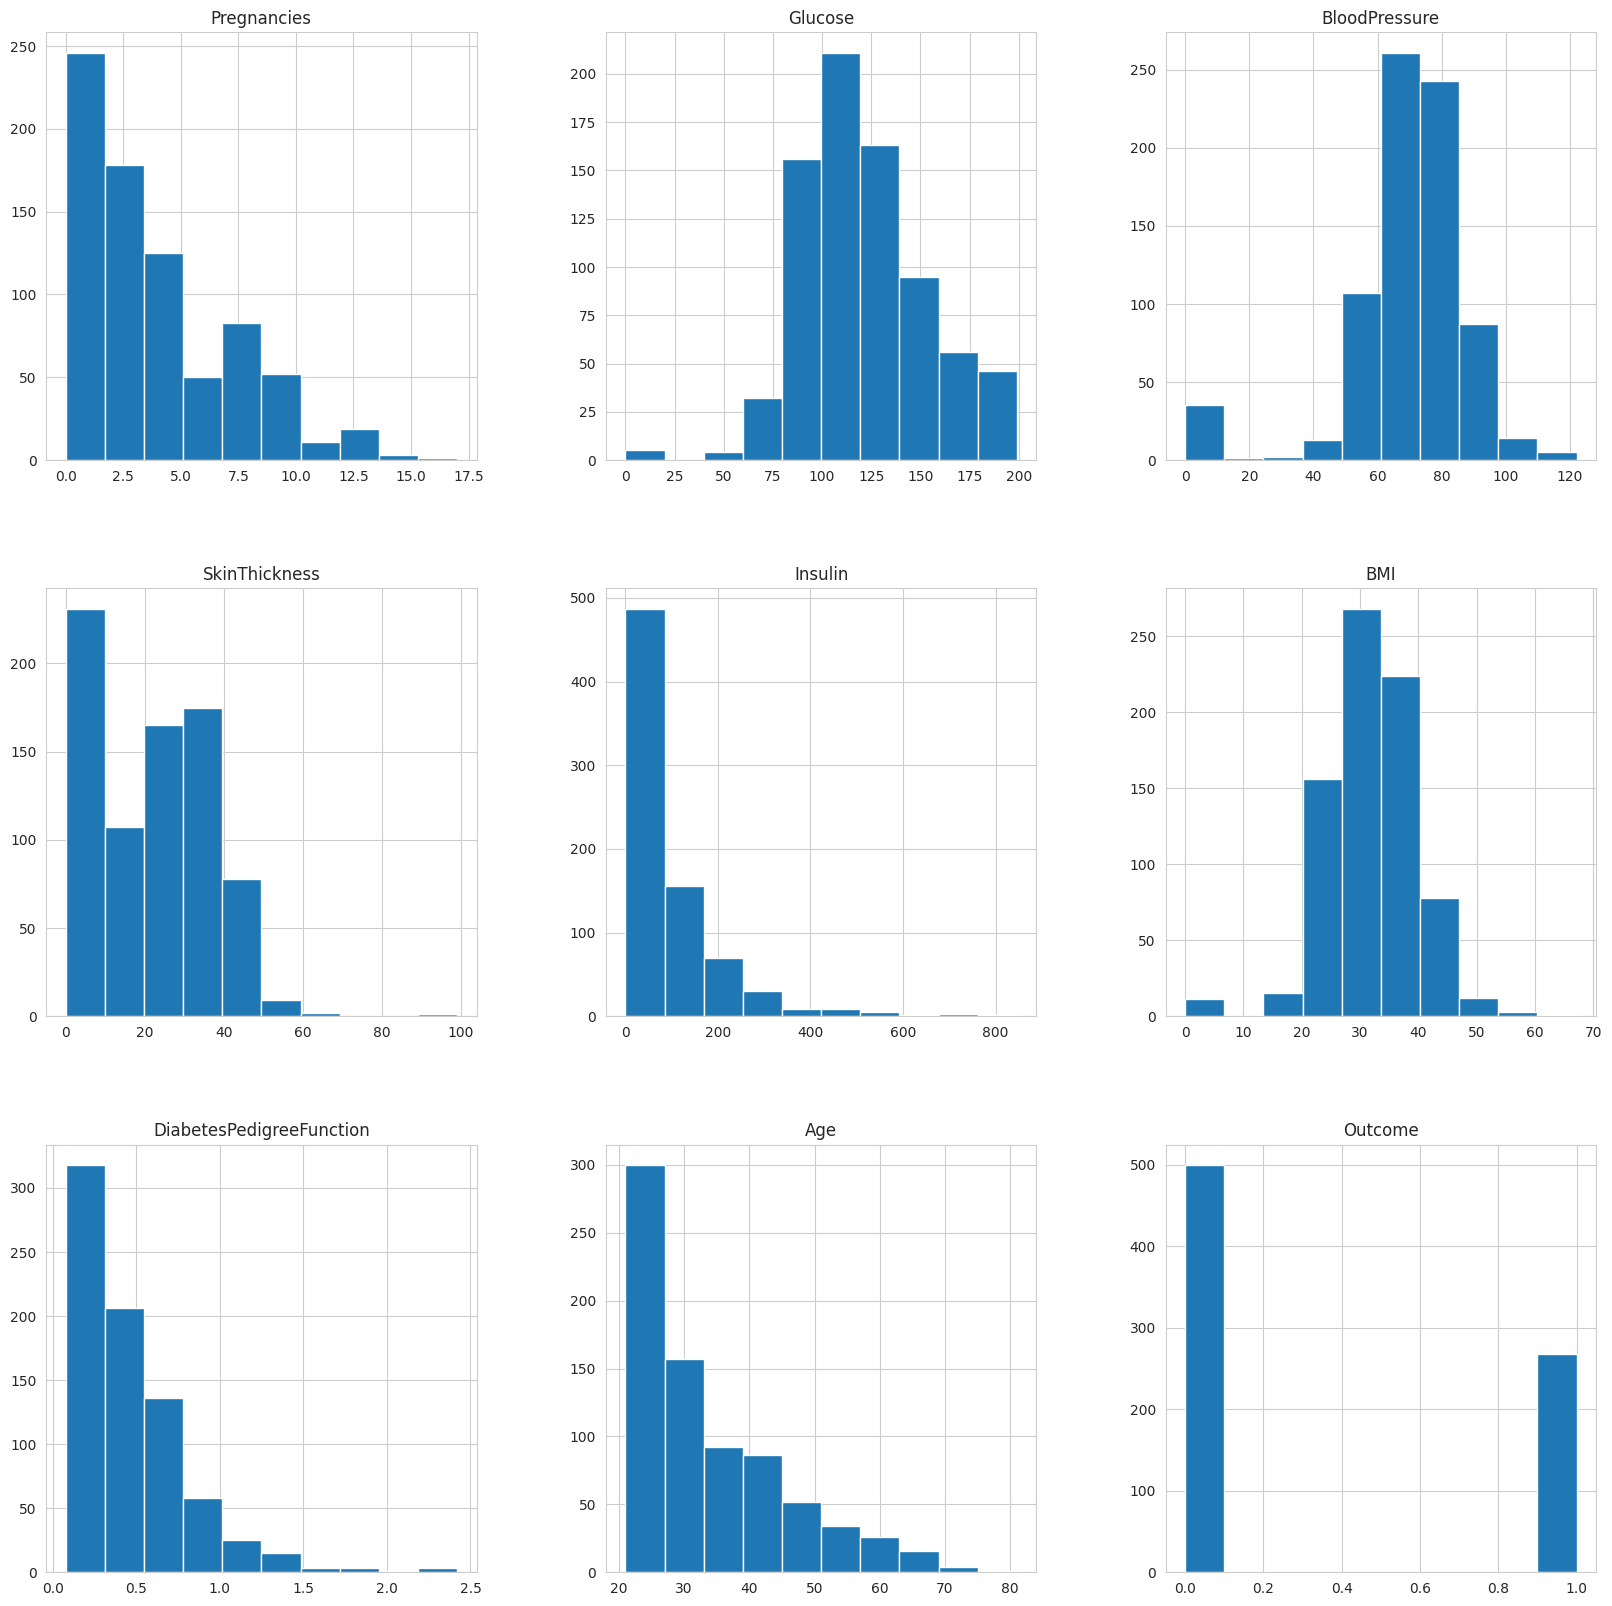

In [61]:
data.hist(figsize=(20,20))
plt.show()

In [57]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Cross-Validation**

Use Cross-Validation: Employ k-fold cross-validation to ensure the model's robustness and avoid overfitting. This helps in assessing the model's performance more reliably.

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(scores.mean())


0.7695696460402341
